<a href="https://colab.research.google.com/github/shre-ramki/Cyberbullying_Detection/blob/main/Cyberbullying_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

In [ ]:
df = pd.read_csv("cyberbullying_dataset.csv")

In [ ]:
df.head()

,tweet_text,cyberbullying_type
0,"In other words #katandandre, your food was cra...",not_cyberbullying
1,Why is #aussietv so white? #MKR #theblock #ImA...,not_cyberbullying
2,@XochitlSuckkks a classy whore? Or more red ve...,not_cyberbullying
3,"@Jason_Gio meh. :P thanks for the heads up, b...",not_cyberbullying
4,@RudhoeEnglish This is an ISIS account pretend...,not_cyberbullying


In [ ]:
df.shape

(47692, 2)

In [ ]:
df.isnull().sum()

tweet_text            0
cyberbullying_type    0
dtype: int64

In [ ]:
df = df.sample(10000)

In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
label_encode = LabelEncoder()

In [ ]:
labels = label_encode.fit_transform(df.cyberbullying_type)

In [ ]:
df['cyberbullying_type'] = labels

In [ ]:
df.head()

,tweet_text,cyberbullying_type
45867,Because your people also created these words c...,0
36797,The bunker boy thought he could bully the sate...,0
26116,@Chijy025 dont bully me on twitter :( i preffe...,0
15043,"WHAT? men can get raped! but, bc of the stigma...",0
20902,"By the way, how the hell u have compared @RSSo...",0


In [ ]:
df.tail()

,tweet_text,cyberbullying_type
37177,It is absolutely disgusting behavior that you ...,0
39439,Really? It’s about emails? We’ve had kids in c...,0
42647,"Guy just said ""black niggers are disgusting an...",0
4110,#Bullying Subscribe to my free self-defense bu...,1
41705,Dumb ass nigger. I swear to god if you hit me ...,0


In [ ]:
df['cyberbullying_type'].value_counts()

0    8322
1    1678
Name: cyberbullying_type, dtype: int64

In [ ]:
type = df['cyberbullying_type'].value_counts()
transactions = type.index
quantity = type.values

import plotly.express as px
figure = px.pie(df, 
                 values=quantity, 
                 names=transactions,hole = 0.5, 
                 title="Distribution of Transaction Type")
figure.show()

In [ ]:
# x = df['tweet_text'].values
# y = df['cyberbullying_type'].values

In [ ]:
# x

In [ ]:
# y

In [ ]:
from sklearn.utils import resample
#create two different dataframe of majority and minority class 
df_majority = df[(df['cyberbullying_type']==0)] 
df_minority = df[(df['cyberbullying_type']==1)] 
# upsample minority class
df_minority_upsampled = resample(df_minority, 
                                 replace=True,    # sample with replacement
                                 n_samples= 8341, # to match majority class
                                 random_state=42)  # reproducible results
# Combine majority class with upsampled minority class
df_upsampled = pd.concat([df_minority_upsampled, df_majority])

In [ ]:
df_upsampled['cyberbullying_type'].value_counts()

1    8341
0    8322
Name: cyberbullying_type, dtype: int64

In [ ]:
type = df_upsampled['cyberbullying_type'].value_counts()
transactions = type.index
quantity = type.values

import plotly.express as px
figure = px.pie(df_upsampled, 
                 values=quantity, 
                 names=transactions,hole = 0.5, 
                 title="Distribution of Transaction Type")
figure.show()

In [ ]:
x = df_upsampled['tweet_text'].values
y = df_upsampled['cyberbullying_type'].values

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,random_state = 0)

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

In [ ]:
#CountVectorization
vect = CountVectorizer(stop_words='english')
x_train_vect = vect.fit_transform(x_train)
x_test_vect = vect.transform(x_test)

In [ ]:
from sklearn.linear_model import LogisticRegression, SGDClassifier

In [ ]:
model3 = SGDClassifier()

In [ ]:
model3.fit(x_train_vect,y_train)

SGDClassifier()

In [ ]:
y_pred3 = model3.predict(x_test_vect)
y_pred3

array([1, 0, 0, ..., 0, 1, 1])

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y_pred3,y_test)

0.9315890542486798

In [ ]:
from sklearn.pipeline import make_pipeline
text_model1 = make_pipeline(CountVectorizer(),SGDClassifier())
text_model1.fit(x_train,y_train)
y_pred3 = text_model1.predict(x_test)
y_pred3

array([0, 0, 0, ..., 0, 1, 1])

In [ ]:
import joblib
joblib.dump(text_model1,'Sentiment1')

['Sentiment1']

In [ ]:
text_model3 = joblib.load('Sentiment1')
# text_model3.predict(["killing joke was a fucked"])
text_model3.predict(["bullied me"])

array([0])

In [ ]:
def pipeline(learner_list, X_train, y_train, X_test, y_test): 
    '''
    inputs:
       - learner: the learning algorithm to be trained and predicted on
       - X_train: features training set
       - y_train: income training set
       - X_test: features testing set
       - y_test: income testing set
    '''
    
    # Get length of Training Data:
    size = len(y_train)
    
    results = {}
    final_results = []
    
    for learner in learner_list:
        
        # Store the learner name:
        results['Algorithm'] = learner.__class__.__name__

        # Fit the learner:
        start = time() # Get start time
        print("Training {}".format(learner.__class__.__name__))
        learner = learner.fit(X_train, y_train)
        end = time() # Get end time

        # Store the training time
        results['Training Time'] = end - start

        start = time() # Get start time
        predictions_test = learner.predict(X_test)
        predictions_train = learner.predict(X_train)
        end = time() # Get end time

        # Store the prediction time
        results['Prediction Time'] = end - start

        # Compute the Accuracy on Test Set
        results['Accuracy: Test'] = accuracy_score(y_test, predictions_test)

        # Compute the Accuracy on Training Set
        results['Accuracy: Train'] = accuracy_score(y_train, predictions_train)

        # Compute the F1 Score on Test Set
        results['F1 Score: Test'] = f1_score(y_test, predictions_test)

        # Compute the F1 Score on Training Set
        results['F1 Score: Train'] = f1_score(y_train, predictions_train)

        # Compute the Precision on Test Set
        results['Precision: Test'] = precision_score(y_test, predictions_test)

        # Compute the Precision on Training Set
        results['Precision: Train'] = precision_score(y_train, predictions_train)

        # Compute the Recall on Test Set
        results['Recall: Test'] = recall_score(y_test, predictions_test)

        # Compute the Recall on Training Set
        results['Recall: Train'] = recall_score(y_train, predictions_train)

        # Success
        print("Training {} finished in {:.2f} sec".format(learner.__class__.__name__, results['Training Time']))
        print('----------------------------------------------------')
        
        final_results.append(results.copy())
    # Return a dataframe of the results
    return final_results

In [ ]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import f1_score, accuracy_score, precision_score, recall_score, make_scorer
from time import time

from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import LinearSVC
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier, BaggingClassifier
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.neighbors import KNeighborsClassifier
import joblib

In [ ]:
# make a list of models
models = [MultinomialNB(), DecisionTreeClassifier(), LinearSVC(), AdaBoostClassifier(), 
          RandomForestClassifier(), BaggingClassifier(),
         LogisticRegression(), SGDClassifier(), KNeighborsClassifier()]

In [ ]:
re = pipeline(models, x_train_vect, y_train, x_test_vect, y_test)
results = pd.DataFrame(re)
results = results.reindex(columns = ['Algorithm', 'Accuracy: Test', 'Precision: Test', 'Recall: Test', 'F1 Score: Test', 'Prediction Time',
                          'Accuracy: Train', 'Precision: Train', 'Recall: Train', 'F1 Score: Train', 'Training Time'])

Training MultinomialNB
Training MultinomialNB finished in 0.01 sec
----------------------------------------------------
Training DecisionTreeClassifier
Training DecisionTreeClassifier finished in 1.92 sec
----------------------------------------------------
Training LinearSVC


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.



Training LinearSVC finished in 0.70 sec
----------------------------------------------------
Training AdaBoostClassifier
Training AdaBoostClassifier finished in 0.80 sec
----------------------------------------------------
Training RandomForestClassifier
Training RandomForestClassifier finished in 13.26 sec
----------------------------------------------------
Training BaggingClassifier
Training BaggingClassifier finished in 14.37 sec
----------------------------------------------------
Training LogisticRegression
Training LogisticRegression finished in 0.64 sec
----------------------------------------------------
Training SGDClassifier
Training SGDClassifier finished in 0.03 sec
----------------------------------------------------
Training KNeighborsClassifier
Training KNeighborsClassifier finished in 0.00 sec
----------------------------------------------------


In [ ]:
results.sort_values(by = 'F1 Score: Test', inplace = True, ascending = False)

In [ ]:
results.reset_index(drop = True)

,Algorithm,Accuracy: Test,Precision: Test,Recall: Test,F1 Score: Test,Prediction Time,Accuracy: Train,Precision: Train,Recall: Train,F1 Score: Train,Training Time
0,RandomForestClassifier,0.945511,0.910828,0.984752,0.946348,1.547523,0.995759,0.992132,0.999524,0.995815,13.256837
1,SGDClassifier,0.937590,0.894878,0.988195,0.939224,0.001823,0.992078,0.985913,0.998573,0.992203,0.033751
2,DecisionTreeClassifier,0.937590,0.898427,0.983276,0.938938,0.016835,0.995759,0.992442,0.999207,0.995813,1.922301
3,LinearSVC,0.934950,0.892253,0.985735,0.936667,0.001381,0.994719,0.990261,0.999366,0.994792,0.695310
4,BaggingClassifier,0.934710,0.898236,0.976881,0.935910,0.171494,0.991678,0.985902,0.997781,0.991806,14.372924
5,LogisticRegression,0.922948,0.870242,0.989670,0.926122,0.001622,0.974794,0.954359,0.997781,0.975587,0.642773
6,MultinomialNB,0.905425,0.893801,0.914904,0.904229,0.005704,0.943266,0.936263,0.952441,0.944283,0.013876
7,KNeighborsClassifier,0.837494,0.786076,0.916380,0.846241,5.225234,0.910138,0.868619,0.968453,0.915823,0.002599
8,AdaBoostClassifier,0.838934,0.792526,0.907526,0.846136,0.201221,0.847163,0.805332,0.919467,0.858623,0.795256


In [ ]:
results.describe().loc[['min', 'max'], :]

,Accuracy: Test,Precision: Test,Recall: Test,F1 Score: Test,Prediction Time,Accuracy: Train,Precision: Train,Recall: Train,F1 Score: Train,Training Time
min,0.837494,0.786076,0.907526,0.846136,0.001381,0.847163,0.805332,0.919467,0.858623,0.002599
max,0.945511,0.910828,0.989670,0.946348,5.225234,0.995759,0.992442,0.999524,0.995815,14.372924


In [ ]:
# store the best metric scores
best_acc = results[results['Accuracy: Test'] == results['Accuracy: Test'].max()]
best_f1 = results[results['F1 Score: Test'] == results['F1 Score: Test'].max()]
best_precision = results[results['Precision: Test'] == results['Precision: Test'].max()]
best_recall = results[results['Recall: Test'] == results['Recall: Test'].max()]

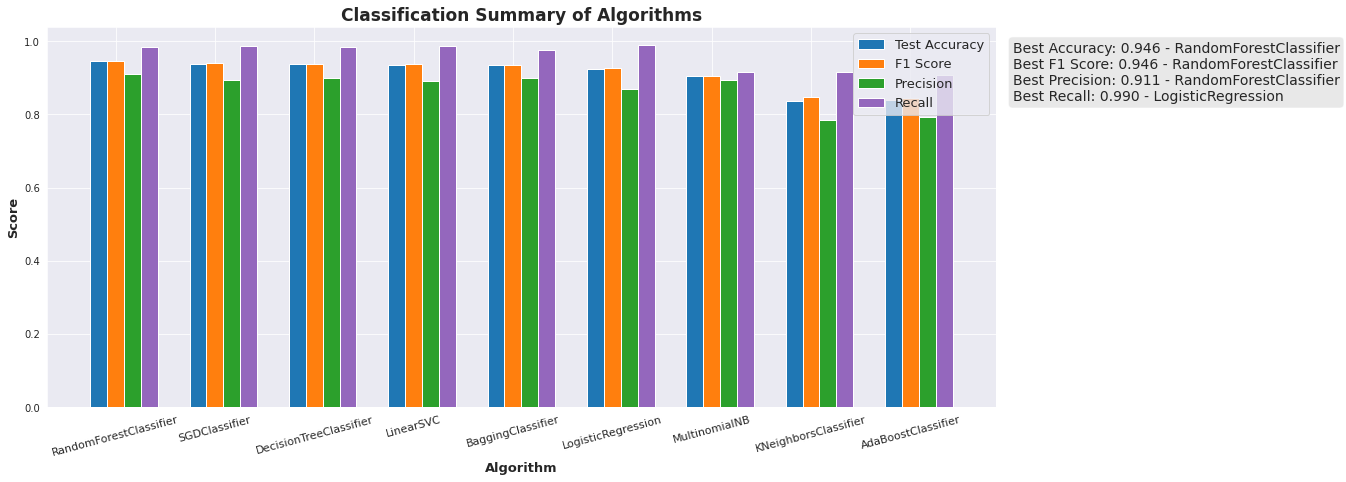

In [ ]:
sns.set_style('darkgrid')
plt.figure(figsize = (17, 7))

barWidth = 0.17
 
# set height of bar
bars1 = results['Accuracy: Test']
bars2 = results['F1 Score: Test']
bars3 = results['Precision: Test']
bars4 = results['Recall: Test']

 
# Set position of bar on X axis
r1 = np.arange(len(bars1))
r2 = [x + barWidth for x in r1]
r3 = [x + barWidth for x in r2]
r4 = [x + barWidth for x in r3]

 
# Make the plot
pal = sns.color_palette()
plt.bar(r1, bars1, color= pal[0], width=barWidth, edgecolor='white', label='Test Accuracy')
plt.bar(r2, bars2, color= pal[1], width=barWidth, edgecolor='white', label='F1 Score')
plt.bar(r3, bars3, color= pal[2], width=barWidth, edgecolor='white', label='Precision')
plt.bar(r4, bars4, color= pal[4], width=barWidth, edgecolor='white', label='Recall')

 
# Add xticks on the middle of the group bars
plt.xlabel('Algorithm', fontweight='bold', fontsize = 13)
plt.ylabel('Score', fontweight = 'bold', fontsize = 13)
plt.xticks([r + barWidth for r in range(len(bars1))], results['Algorithm'], rotation = 15, fontsize = 11)
 
# Create legend & Show graphic
plt.legend(fontsize = 13)

textstr = '\n'.join(['Best Accuracy: {:.3f} - {}'.format(best_acc['Accuracy: Test'].values[0], best_acc['Algorithm'].values[0]), 
                     'Best F1 Score: {:.3f} - {}'.format(best_f1['F1 Score: Test'].values[0], best_f1['Algorithm'].values[0]),
                   'Best Precision: {:.3f} - {}'.format(best_precision['Precision: Test'].values[0], best_precision['Algorithm'].values[0]), 
                    'Best Recall: {:.3f} - {}'.format(best_recall['Recall: Test'].values[0], best_recall['Algorithm'].values[0])])
props = dict(boxstyle='round', facecolor='lightgrey', alpha=0.5)

#place a text box
plt.text(9.2, 1, textstr, fontsize=14,
        verticalalignment='top', bbox=props)

plt.title('Classification Summary of Algorithms', fontweight = 'bold', fontsize = 17);

In [ ]:
# store the best/worst performance time
best_train_time = results[results['Training Time'] == results['Training Time'].min()]
worst_train_time = results[results['Training Time'] == results['Training Time'].max()]
best_prediction_time = results[results['Prediction Time'] == results['Prediction Time'].min()]
worst_prediction_time = results[results['Prediction Time'] == results['Prediction Time'].max()]

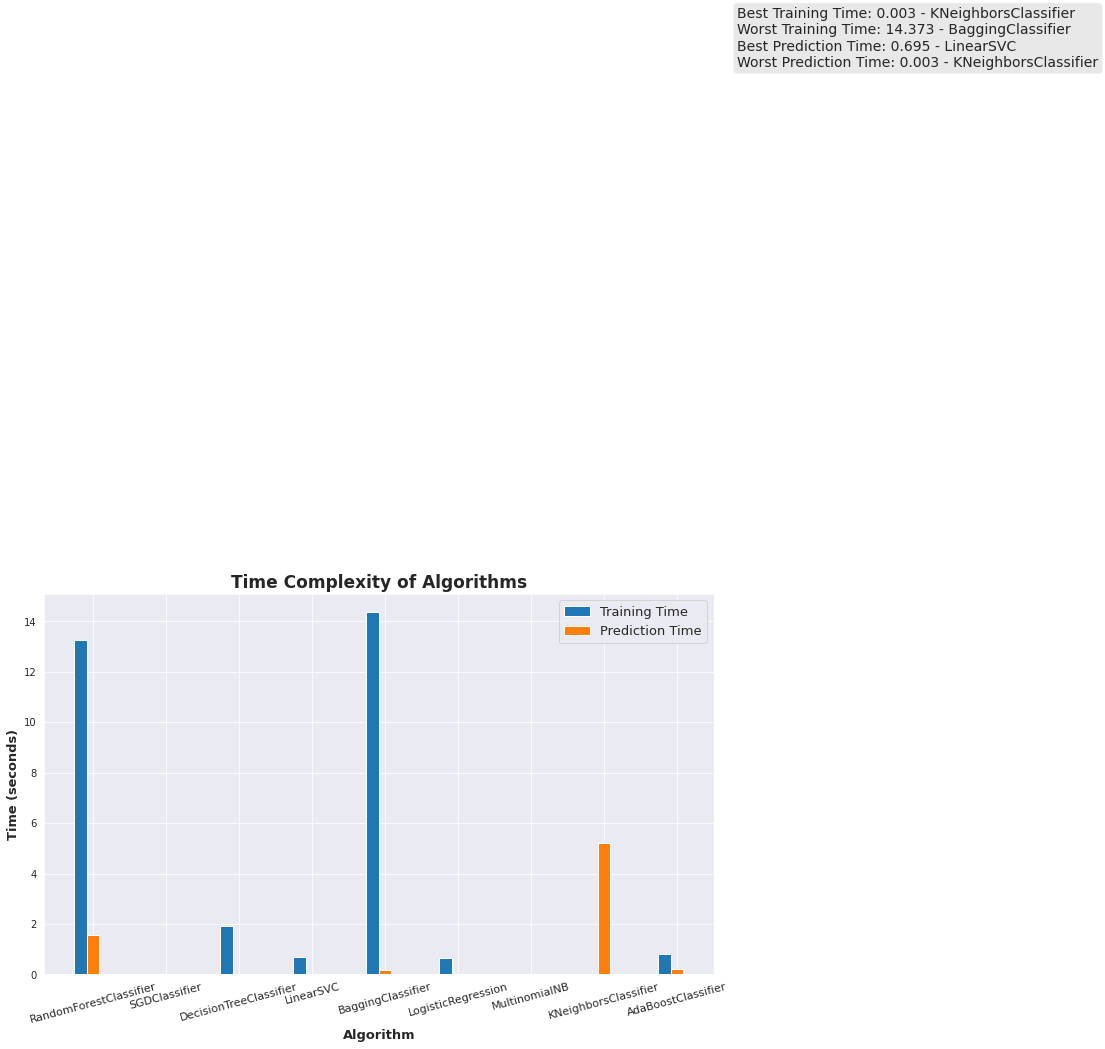

In [ ]:
plt.figure(figsize = (12, 7))

barWidth = 0.17
 
# set height of bar
bars1 = results['Training Time']
bars2 = results['Prediction Time']
 
# Set position of bar on X axis
r1 = np.arange(len(bars1))
r2 = [x + barWidth for x in r1]
 
# Make the plot
plt.bar(r1, bars1, color= pal[0], width=barWidth, edgecolor='white', label='Training Time')
plt.bar(r2, bars2, color= pal[1], width=barWidth, edgecolor='white', label='Prediction Time')
 
# Add xticks on the middle of the group bars
plt.xlabel('Algorithm', fontweight='bold', fontsize = 13)
plt.ylabel('Time (seconds)', fontweight = 'bold', fontsize = 13)
plt.xticks([r + barWidth for r in range(len(bars1))], results['Algorithm'], rotation = 15, fontsize = 11)
 
# Create legend & Show graphic
plt.legend(fontsize = 13)

textstr = '\n'.join(('Best Training Time: {:.3f} - {}'.format(best_train_time['Training Time'].values[0], best_train_time['Algorithm'].values[0]), 
                     'Worst Training Time: {:.3f} - {}'.format(worst_train_time['Training Time'].values[0], worst_train_time['Algorithm'].values[0]),
                   'Best Prediction Time: {:.3f} - {}'.format(best_prediction_time['Training Time'].values[0], best_prediction_time['Algorithm'].values[0]), 
                    'Worst Prediction Time: {:.3f} - {}'.format(worst_prediction_time['Training Time'].values[0], worst_prediction_time['Algorithm'].values[0])))

props = dict(boxstyle='round', facecolor='lightgrey', alpha=0.5)

#place a text box
plt.text(9, 36, textstr, fontsize=14,  bbox=props)

plt.title('Time Complexity of Algorithms', fontweight = 'bold', fontsize = 17);

In [ ]:
def param_tuning(clf, param_dict, X_train, y_train, X_test, y_test):
    
    # make scorer object
    scorer = make_scorer(f1_score)

    # perform Grid Search for Parameters
    grid_obj = GridSearchCV(estimator = clf,
                           param_grid = param_dict,
                           scoring = scorer,
                           cv = 5)

    grid_fit = grid_obj.fit(X_train, y_train)

    # Get the estimator
    best_clf = grid_fit.best_estimator_

    # Make predictions using the unoptimized and model
    predictions = (clf.fit(X_train, y_train)).predict(X_test)
    best_predictions = best_clf.predict(X_test)
    
    # Report the before-and-afterscores
    print(clf.__class__.__name__)
    print("\nOptimized Model\n------")
    print("Best Parameters: {}".format(grid_fit.best_params_))
    print("Accuracy: {:.4f}".format(accuracy_score(y_test, best_predictions)))
    print("F1-score: {:.4f}".format(f1_score(y_test, best_predictions)))
    print("Precision: {:.4f}".format(precision_score(y_test, best_predictions)))
    print("Recall: {:.4f}".format(recall_score(y_test, best_predictions)))

In [ ]:
# Dict for parameters
param_grid = {
    'alpha' : [0.095, 0.0002, 0.0003],
    'max_iter' : [2500, 3000, 4000]
}

clf_sgd = SGDClassifier()

param_tuning(clf_sgd, param_grid, x_train_vect, y_train, x_test_vect, y_test)

SGDClassifier

Optimized Model
------
Best Parameters: {'alpha': 0.0002, 'max_iter': 4000}
Accuracy: 0.9275
F1-score: 0.9300
Precision: 0.8791
Recall: 0.9872


In [ ]:
# Dict for parameters
param_grid = {
    'C': [1, 1.2, 1.3, 1.4]
}

clf_lr = LogisticRegression()

param_tuning(clf_lr, param_grid, x_train_vect, y_train, x_test_vect, y_test)

LogisticRegression

Optimized Model
------
Best Parameters: {'C': 1.4}
Accuracy: 0.9258
F1-score: 0.9287
Precision: 0.8751
Recall: 0.9892


In [ ]:
param_grid = {
    'min_samples_split': [2, 5, 8],
    'min_samples_leaf': [1, 2, 5, 8]
}

clf_dt = DecisionTreeClassifier()

param_tuning(clf_dt, param_grid, x_train_vect, y_train, x_test_vect, y_test)

DecisionTreeClassifier

Optimized Model
------
Best Parameters: {'min_samples_leaf': 1, 'min_samples_split': 2}
Accuracy: 0.9386
F1-score: 0.9398
Precision: 0.9004
Recall: 0.9828


In [ ]:
param_grid = {
    'n_estimators': [50,150],
    'min_samples_leaf': [1, 5],
    'min_samples_split': [2, 5]
}

clf_rf = RandomForestClassifier()

param_tuning(clf_rf, param_grid, x_train_vect, y_train, x_test_vect, y_test)

RandomForestClassifier

Optimized Model
------
Best Parameters: {'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 50}
Accuracy: 0.9518
F1-score: 0.9521
Precision: 0.9233
Recall: 0.9828


In [ ]:
param_grid = {
    'C': [0.25, 0.5, 0.75, 1, 1.2]
}

clf_linsvc = LinearSVC(max_iter=1000)

param_tuning(clf_linsvc, param_grid, x_train_vect, y_train, x_test_vect, y_test)

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarni

LinearSVC

Optimized Model
------
Best Parameters: {'C': 1.2}
Accuracy: 0.9357
F1-score: 0.9373
Precision: 0.8934
Recall: 0.9857


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.



In [ ]:
# To predict the text which is non-cyberbullying
text_model3 = joblib.load('Sentiment1')
text_model3.predict(["subscribe to my channel"])


array([1])

In [ ]:
# To predict the text which is cyberbullying
text_model3 = joblib.load('Sentiment1')
text_model3.predict(["Dumb idiot"])

array([0])